In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
import numpy as np
import seaborn as sns
import os
from datetime import date
import glob
import scipy
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Change the directory to where the data is stored
os.chdir('/Users/f67f911/Desktop/HG2022_Data/Data')

In [3]:
# Set the SWE Path, which is the folder within data with the SWE Compare 
# tables
# The SWE Compare tables are created by comparing the measured versus modeled SWE for each collection day
# This data should not need to be updated
swe_path = 'SWE_Compare'
# View all the swe_compare .csv files
swe_files = glob.glob(swe_path +'/*.csv')
# Sort the files by date
swe_files.sort()
# View the files to make sure each date is there
swe_files

['SWE_Compare/20220212_SWE_Compare.csv',
 'SWE_Compare/20220325_SWE_Compare.csv',
 'SWE_Compare/20220407_SWE_Compare.csv',
 'SWE_Compare/20220505_SWE_Compare.csv',
 'SWE_Compare/20220510_SWE_Compare.csv',
 'SWE_Compare/20220517_SWE_Compare.csv']

In [4]:
# Create an empty list to hold all dataframes for the read in csv files
swe_df_holder = []
# Create a for loop to cycle through all of the swe_files
for j in (swe_files):
    # Create a new dataframe for each file
    df = pd.read_csv(j)
    # Change list of lists to a dataframe
    df = pd.DataFrame(df)
    # Split the basename of the files to extract the date to add to a column
    date = os.path.basename(j)
    date = os.path.splitext(date)[0]
    date = date.replace('_SWE_Compare', '')
    # # Create a new column in the dataframe to hold the date values
    df['date'] = date
    
    # Append the list of df_holder with all of the values for the individual dataframes
    swe_df_holder.append(df)
    #snotel_df_holder = pd.DataFrame()
    swe_df_holder
# Create a new dataframe that contains all of the dataframes created in the above loop
swe_data_df = pd.concat(swe_df_holder, axis = 0, ignore_index = False, join = 'outer')
# Create a new column titled 'Year' to hold the year derived from the datetime column

swe_data_df['datetime'] = pd.to_datetime(swe_data_df['date'], format='%Y%m%d')

# Check the dataframe to make sure the data has been read in correctly
swe_data_df.head()

,PT#,Sdepth (cm),CoreDepth (cm),Weight (g),Tare Weight (g),SWE (cm),SWE (m),Density (g/cm^3),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,SnowDepth (cm),Core Depth (cm),TARE Weight (g),SWE (mm),Density (kgm^-3),datetime
0,1,105.0,112.0,84,42.0,42,0.42,0.400000,40.000000,0.354443,0.353281,NaN,20220212,NaN,NaN,NaN,NaN,NaN,2022-02-12
1,2,125.0,122.0,82,42.0,40,0.40,0.320000,32.000000,0.247664,0.246852,0.276084,20220212,NaN,NaN,NaN,NaN,NaN,2022-02-12
2,3,93.0,91.0,68,42.0,26,0.26,0.279570,27.956989,0.234260,0.233492,0.261143,20220212,NaN,NaN,NaN,NaN,NaN,2022-02-12
3,4,114.0,106.0,80,42.0,38,0.38,0.333333,33.333333,0.336870,0.335766,0.375527,20220212,NaN,NaN,NaN,NaN,NaN,2022-02-12
4,5,100.0,93.0,82,42.0,40,0.40,0.400000,40.000000,0.137384,0.136934,0.153149,20220212,NaN,NaN,NaN,NaN,NaN,2022-02-12


In [5]:
# View the columns. I tried to ensure that I kept column names constant,
# but some of the columns may be slightly different.
swe_data_df.columns

Index(['PT#', 'Sdepth (cm)', 'CoreDepth (cm)', 'Weight (g)', 'Tare Weight (g)',
       'SWE (cm)', 'SWE (m)', 'Density (g/cm^3)', 'Density %', 'snotel_SWE',
       'deltasnow_SWE', 'manual_SWE', 'date', 'SnowDepth (cm)',
       'Core Depth (cm)', 'TARE Weight (g)', 'SWE (mm)', 'Density (kgm^-3)',
       'datetime'],
      dtype='object')

In [6]:
# Drop the unnnecessary data for this visualization
swe_data_df = swe_data_df.drop(['SnowDepth (cm)','Core Depth (cm)','Weight (g)',
                               'TARE Weight (g)','SWE (cm)','SWE (mm)', 'Density (g/cm^3)',
                               'Density (kgm^-3)','Sdepth (cm)', 'CoreDepth (cm)',
                               'Tare Weight (g)'],axis = 1)
# View the head of the data to make sure only the required columns are included
swe_data_df.head()                       

,PT#,SWE (m),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,datetime
0,1,0.42,40.000000,0.354443,0.353281,NaN,20220212,2022-02-12
1,2,0.40,32.000000,0.247664,0.246852,0.276084,20220212,2022-02-12
2,3,0.26,27.956989,0.234260,0.233492,0.261143,20220212,2022-02-12
3,4,0.38,33.333333,0.336870,0.335766,0.375527,20220212,2022-02-12
4,5,0.40,40.000000,0.137384,0.136934,0.153149,20220212,2022-02-12


In [7]:
# Create a label for the date based on Month (MMM) and Day (DD)
swe_data_df['date_label'] = pd.to_datetime(swe_data_df['datetime']).dt.strftime('%b %d')
swe_data_df.head()

,PT#,SWE (m),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,datetime,date_label
0,1,0.42,40.000000,0.354443,0.353281,NaN,20220212,2022-02-12,Feb 12
1,2,0.40,32.000000,0.247664,0.246852,0.276084,20220212,2022-02-12,Feb 12
2,3,0.26,27.956989,0.234260,0.233492,0.261143,20220212,2022-02-12,Feb 12
3,4,0.38,33.333333,0.336870,0.335766,0.375527,20220212,2022-02-12,Feb 12
4,5,0.40,40.000000,0.137384,0.136934,0.153149,20220212,2022-02-12,Feb 12


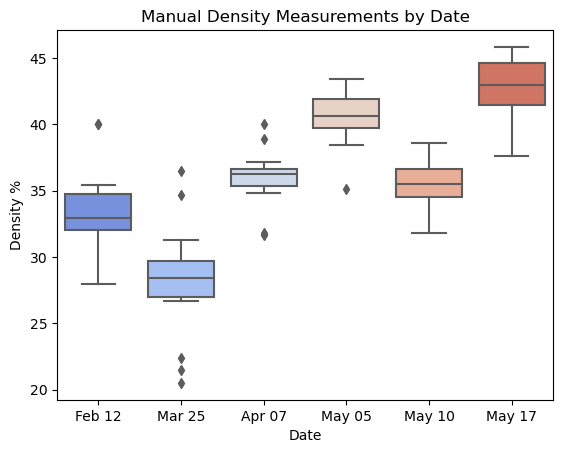

In [8]:
# Create a boxplot of the manual density measurements for each date
sns.boxplot(data=swe_data_df, x="date_label", y="Density %", palette = "coolwarm" ).set(title = 'Manual Density Measurements by Date')
plt.xlabel('Date')
# Save the figure
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/Man_Density_Date.png')

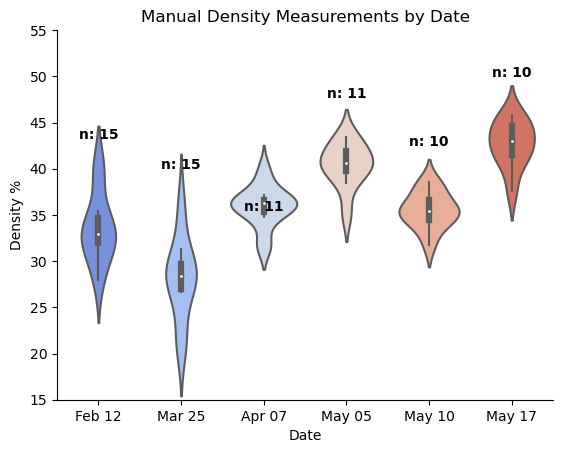

In [10]:
# Create the same graph as above, but as a violin plot
ax = sns.violinplot(x="date_label", y="Density %", data=swe_data_df,  palette = "coolwarm" )
plt.ylim(15,55)
# Calculate number of obs per group & median to position labels
medians = swe_data_df.groupby(['date_label'])['Density %'].median().values
nobs = swe_data_df['date_label'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add the number of observations to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+ 7, nobs[tick],
        horizontalalignment='center',
        # verticalalignment = "center_baseline",
        size='medium',
        color='black',
        weight='bold')
# Make sure the plot starts at 0,0
sns.despine()
ax.set(title = 'Manual Density Measurements by Date')
plt.xlabel('Date')
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/Man_Density_Date.png')

In [11]:
# Calculate the differences between the manually surveyed SWE and the modeled
# SWE for each of the processing models
swe_data_df['SNOTEL Diff'] = swe_data_df['snotel_SWE'] - swe_data_df['SWE (m)']
swe_data_df[r'$\Delta$SNOW Diff'] = swe_data_df['deltasnow_SWE'] - swe_data_df['SWE (m)']
swe_data_df['Manual Diff'] = swe_data_df['manual_SWE'] - swe_data_df['SWE (m)']
# Make sure the new columns populated correctly
swe_data_df.head()

,PT#,SWE (m),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,datetime,date_label,SNOTEL Diff,$\Delta$SNOW Diff,Manual Diff
0,1,0.42,40.000000,0.354443,0.353281,NaN,20220212,2022-02-12,Feb 12,-0.065557,-0.066719,NaN
1,2,0.40,32.000000,0.247664,0.246852,0.276084,20220212,2022-02-12,Feb 12,-0.152336,-0.153148,-0.123916
2,3,0.26,27.956989,0.234260,0.233492,0.261143,20220212,2022-02-12,Feb 12,-0.025740,-0.026508,0.001143
3,4,0.38,33.333333,0.336870,0.335766,0.375527,20220212,2022-02-12,Feb 12,-0.043130,-0.044234,-0.004473
4,5,0.40,40.000000,0.137384,0.136934,0.153149,20220212,2022-02-12,Feb 12,-0.262616,-0.263066,-0.246851


In [12]:
# Find the mean of the differences for each of the modeling approaches
(np.mean(swe_data_df['SNOTEL Diff']),np.mean(swe_data_df[r'$\Delta$SNOW Diff']),np.mean(swe_data_df['Manual Diff']))

(0.02497668571428571, -0.0040454285714285766, -0.013855166666666672)

In [14]:
# view the March 25 data
march = swe_data_df.loc[swe_data_df['date'] == '20220325']
march.head()

,PT#,SWE (m),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,datetime,date_label,SNOTEL Diff,$\Delta$SNOW Diff,Manual Diff
0,1,0.36,27.7,0.646594,0.594867,0.506191,20220325,2022-03-25,Mar 25,0.286594,0.234867,0.146191
1,2,0.50,36.5,0.819372,0.753823,0.641452,20220325,2022-03-25,Mar 25,0.319372,0.253823,0.141452
2,3,0.38,28.4,0.934558,0.859793,0.731625,20220325,2022-03-25,Mar 25,0.554558,0.479793,0.351625
3,4,0.36,27.3,0.995740,0.916080,0.779522,20220325,2022-03-25,Mar 25,0.635740,0.556080,0.419522
4,5,0.26,20.5,0.958569,0.881884,NaN,20220325,2022-03-25,Mar 25,0.698569,0.621884,NaN


In [15]:
# Create a new dataframe with the dropped March 25 data
march_dropped = swe_data_df.loc[swe_data_df['date'] != '20220325']
march_dropped.head()

,PT#,SWE (m),Density %,snotel_SWE,deltasnow_SWE,manual_SWE,date,datetime,date_label,SNOTEL Diff,$\Delta$SNOW Diff,Manual Diff
0,1,0.42,40.000000,0.354443,0.353281,NaN,20220212,2022-02-12,Feb 12,-0.065557,-0.066719,NaN
1,2,0.40,32.000000,0.247664,0.246852,0.276084,20220212,2022-02-12,Feb 12,-0.152336,-0.153148,-0.123916
2,3,0.26,27.956989,0.234260,0.233492,0.261143,20220212,2022-02-12,Feb 12,-0.025740,-0.026508,0.001143
3,4,0.38,33.333333,0.336870,0.335766,0.375527,20220212,2022-02-12,Feb 12,-0.043130,-0.044234,-0.004473
4,5,0.40,40.000000,0.137384,0.136934,0.153149,20220212,2022-02-12,Feb 12,-0.262616,-0.263066,-0.246851


In [16]:
# View the mean difference value for the March data
(np.mean(march['SNOTEL Diff']),np.mean(march[r'$\Delta$SNOW Diff']),np.mean(march['Manual Diff']))

(0.48758726666666674, 0.4178072666666667, 0.2856613)

In [17]:
# View that same mean difference for when March 25 is dropped 
(np.mean(march_dropped['SNOTEL Diff']),np.mean(march_dropped[r'$\Delta$SNOW Diff']),np.mean(march_dropped['Manual Diff']))

(-0.10118983636363638, -0.11909616363636366, -0.10745406250000002)

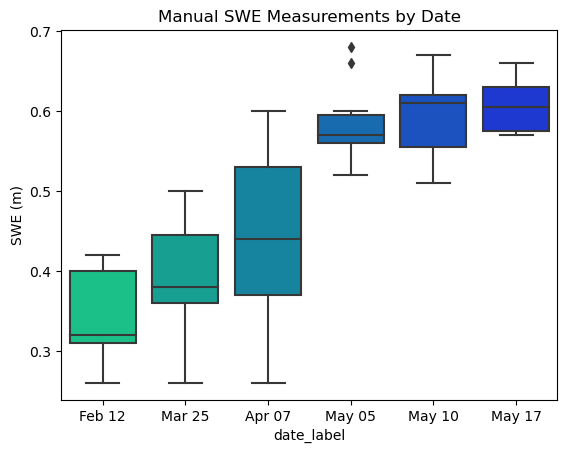

In [19]:
# Create a boxplot of the measured SWE for each day of collection
# These boxplots are based on the 10 - 15 manual points of SWE measurements
# taken in the meadow site
measure_plt = sns.boxplot(data=swe_data_df, x="date_label", y="SWE (m)", palette = "winter_r" ).set(title = 'Manual SWE Measurements by Date')

# This plot shows an increase in measured SWE as the year progresses. 
# Additionally, the variability in SWE for points is greater earlier in the season 
# (unil April 07) and then the measured SWE have a much smaller spread. 
# Peak mean SWE is reached on May 10 2022 based on manual measurements
# As we see, SWE varies a lot less across time than density does

In [21]:
# Manipulate the data so that all the swe values are stored in one column 
# as well as the model type used to calculate the SWE value
df = pd.melt(swe_data_df,id_vars = ['date_label'],value_vars = ['SWE (m)','manual_SWE','snotel_SWE','deltasnow_SWE'])
df.head()

,date_label,variable,value
0,Feb 12,SWE (m),0.42
1,Feb 12,SWE (m),0.40
2,Feb 12,SWE (m),0.26
3,Feb 12,SWE (m),0.38
4,Feb 12,SWE (m),0.40


In [22]:
# Rename the columns of the melted dataframe
df.columns = ['date','model','swe']
# Make sure the dataframe has been updated
df.head()

,date,model,swe
0,Feb 12,SWE (m),0.42
1,Feb 12,SWE (m),0.40
2,Feb 12,SWE (m),0.26
3,Feb 12,SWE (m),0.38
4,Feb 12,SWE (m),0.40


In [24]:
# Create a subset only with the modeled data, not with the manual SWE measurements
modeled_df = pd.melt(swe_data_df,id_vars = ['date_label'],value_vars = ['snotel_SWE','deltasnow_SWE','manual_SWE'])
modeled_df.columns = ['date','model','swe']

<Axes: xlabel='date', ylabel='swe'>

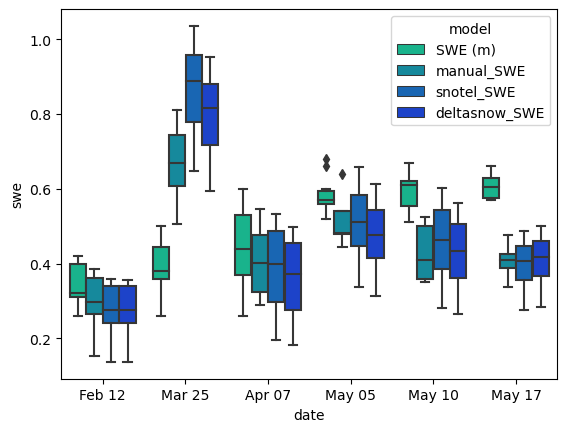

In [25]:
# Create a representation on how the validation points, and modeled SWE values changes over time
sns.boxplot(data=df, x="date", y="swe", hue="model", palette = "winter_r" )

<Axes: xlabel='model', ylabel='swe'>

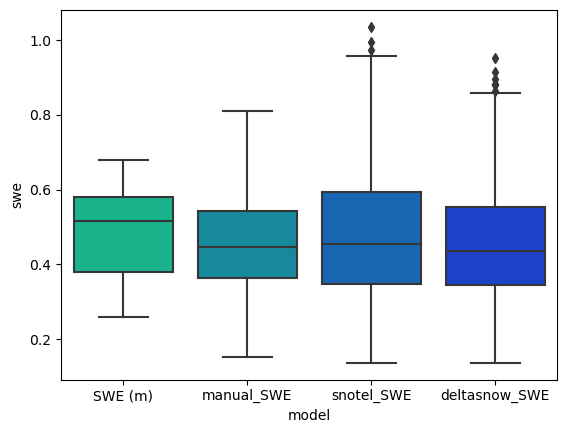

In [27]:
# Look at the aggregated relationship for validation points and modeled for each day
sns.boxplot(data=df, x="model", y="swe", palette = "winter_r" )

In [29]:
# Create a subset of the above melted dataframe for the data without March included
mar_dropped = df[df.date != 'Mar 25']
# Print the unique dates from the date column to make sure that March 25 has been removed
print(mar_dropped['date'].unique())

['Feb 12' 'Apr 07' 'May 05' 'May 10' 'May 17']


<Axes: xlabel='date', ylabel='swe'>

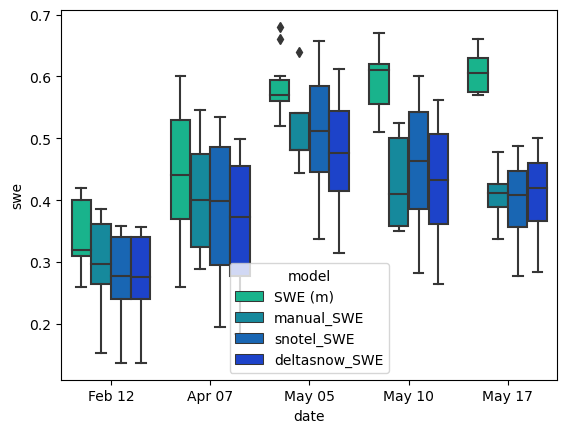

In [30]:
# Plot the same relationship but when March 25 has been dropped
sns.boxplot(data=mar_dropped, x="date", y="swe", hue="model", palette = "winter_r" )

In [31]:
# Create a new dataframe that contains the difference values between the modeled
# and measured SWE
diff_df = pd.melt(swe_data_df,id_vars = ['date_label'],value_vars = ['Manual Diff','SNOTEL Diff',r'$\Delta$SNOW Diff'])
diff_df.head()

,date_label,variable,value
0,Feb 12,Manual Diff,NaN
1,Feb 12,Manual Diff,-0.123916
2,Feb 12,Manual Diff,0.001143
3,Feb 12,Manual Diff,-0.004473
4,Feb 12,Manual Diff,-0.246851


In [32]:
# Change the diff_df column names
diff_df.columns = ['date','model','swe_diff']
diff_df.head()

,date,model,swe_diff
0,Feb 12,Manual Diff,NaN
1,Feb 12,Manual Diff,-0.123916
2,Feb 12,Manual Diff,0.001143
3,Feb 12,Manual Diff,-0.004473
4,Feb 12,Manual Diff,-0.246851


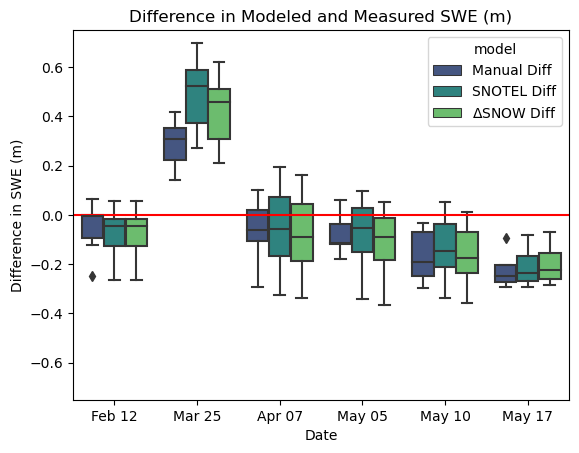

In [34]:
# Now visualize the range in difference values for each flight date
ax = sns.boxplot(data=diff_df, x="date", y="swe_diff", hue="model", palette = "viridis" )
plt.ylim(-0.75,0.75)
plt.axhline(0, color = 'r')
plt.title('Difference in Modeled and Measured SWE (m)')
plt.xlabel('Date')
plt.ylabel('Difference in SWE (m)')
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SWE_Compare/Date_SWE_diffs.png')

In [35]:
# Create a dataframe for the March data
mar = diff_df.loc[diff_df['date'] == 'Mar 25']

In [36]:
# Now create a dataframe with March dropped
mar_dropped_diff = diff_df[diff_df.date != 'Mar 25']
mar_dropped_diff.head()

,date,model,swe_diff
0,Feb 12,Manual Diff,NaN
1,Feb 12,Manual Diff,-0.123916
2,Feb 12,Manual Diff,0.001143
3,Feb 12,Manual Diff,-0.004473
4,Feb 12,Manual Diff,-0.246851


In [37]:
print(mar_dropped_diff['date'].unique())

['Feb 12' 'Apr 07' 'May 05' 'May 10' 'May 17']


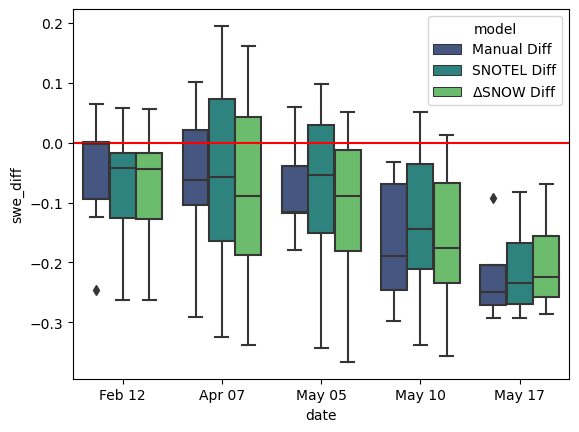

In [38]:
# View the same distribution as above, now with March dropped from the analysis. 
graph = sns.boxplot(data=mar_dropped_diff, x="date", y="swe_diff", hue="model", palette = "viridis" )
graph.axhline(0, color = 'r')
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SWE_Compare/Date_SWE_diffs_NoMar.png')

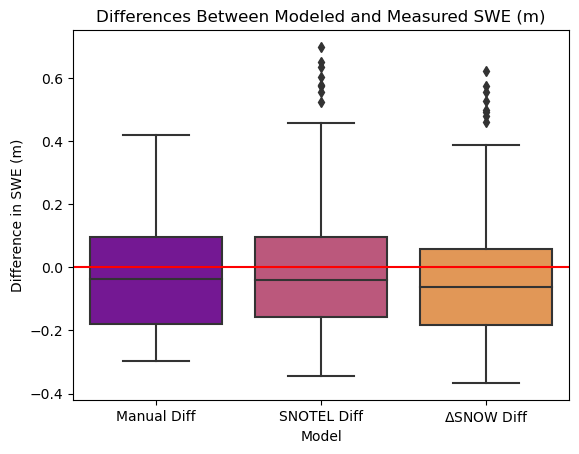

In [39]:
# View the total difference between modeled and measured SWE for each approach
swe_box = sns.boxplot(data=diff_df, x="model", y="swe_diff", palette = 'plasma')
swe_box.axhline(0, color = 'r')
swe_box.set_title('Differences Between Modeled and Measured SWE (m)')
swe_box.set_xlabel('Model')
swe_box.set_ylabel('Difference in SWE (m)')
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SWE_Compare/Total_SWE_diff.png')

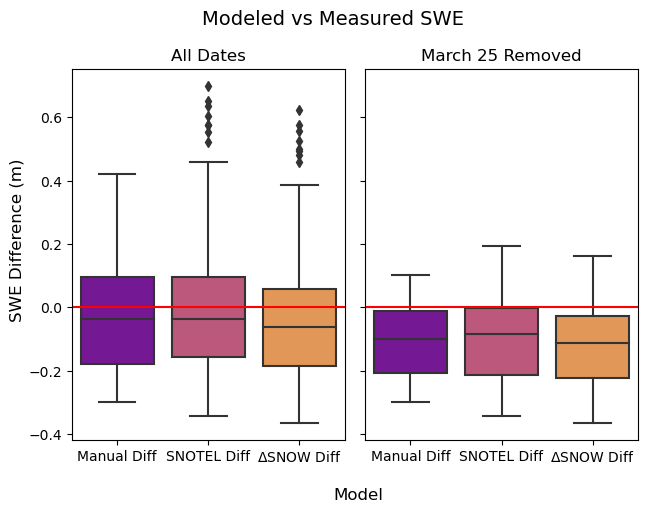

In [41]:
# Plot the relationship between total modeled versus measured SWE for the combined flight dates with and 
# without March 25 being removed
fig, axs = plt.subplots(1,2, sharey = True, sharex = True, tight_layout = True)
fig.suptitle('Modeled vs Measured SWE', fontsize = 14)
labels = ['Manual Diff', 'SNOTEL Diff', r'$\Delta$SNOW Diff']
sns.boxplot(data=diff_df, x="model", y="swe_diff", palette = 'plasma', ax = axs[0])
axs[0].set_title('All Dates')
axs[0].axhline(0, color = 'r')
axs[0].set_xlabel('')
axs[0].set_xticklabels(labels, size = 10)
axs[0].set_ylabel('')
sns.boxplot(data=mar_dropped_diff, x="model", y="swe_diff", palette = 'plasma', ax = axs[1])
axs[1].set_title('March 25 Removed')
axs[1].axhline(0, color = 'r')
axs[1].set_xlabel('')
axs[1].set_xticklabels(labels, size = 10)
axs[1].set_ylabel('')
fig.text(0.54, -0.04, 'Model', ha='center', fontsize = 12)
fig.text(-0.005, 0.5, 'SWE Difference (m)', va='center', rotation='vertical', fontsize = 12)
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SWE_Compare/MarCompare.png', bbox_inches = "tight")

## Run some simple stats on the data

In [42]:
stats.ttest_1samp(swe_data_df.dropna()['Manual Diff'], popmean=0.0)

TtestResult(statistic=-0.43912887064779105, pvalue=0.662873860088085, df=41)

In [43]:
stats.ttest_1samp(swe_data_df.dropna()['SNOTEL Diff'], popmean=0.0)

TtestResult(statistic=0.57752452268035, pvalue=0.5667434200627621, df=41)

In [44]:
stats.ttest_1samp(swe_data_df.dropna()[r'$\Delta$SNOW Diff'], popmean=0.0)

TtestResult(statistic=-0.11984854255437022, pvalue=0.9051884897793974, df=41)